/tmp/ipykernel_826573/1673741987.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(dataANAKL12)), cmap='gray')


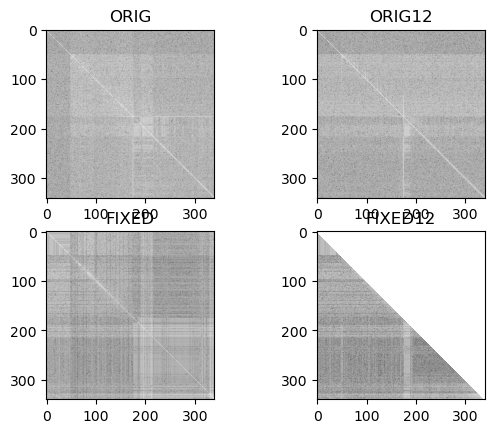

In [1807]:
# load a matrix from a space-separated file and show it as an image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataORIG = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_results/post_sigma')
dataORIG12 = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_results/post_sigma12')
dataANAKL = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_results_anakl/post_sigma')
dataANAKL12 = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_results_anakl/post_sigma12')
plt.subplot(2, 2, 1)
plt.imshow(np.log10(np.abs(dataORIG)), cmap='gray')
plt.title('ORIG')
plt.subplot(2, 2, 2)
plt.imshow(np.log10(np.abs(dataORIG12)), cmap='gray')
plt.title('ORIG12')
plt.subplot(2, 2, 3)
plt.imshow(np.log10(np.abs(dataANAKL)), cmap='gray')
plt.title('FIXED')
plt.subplot(2, 2, 4)
plt.imshow(np.log10(np.abs(dataANAKL12)), cmap='gray')
plt.title('FIXED12')
plt.show()

In [1808]:
dataANAKL12[:10,:10]

array([[ 4.89447  ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184,  4.84851  ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224,  4.84335  ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224, -0.0605003,  4.83743  ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224, -0.0605003, -0.108146 ,  4.86488  ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224, -0.0605003, -0.108146 , -0.0286175,
         4.81497  ,  0.       ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224, -0.0605003, -0.108146 , -0.0286175,
        -0.0394165,  4.84359  ,  0.       ,  0.       ,  0.       ],
       [-0.0454184, -0.0961224, -0.060500

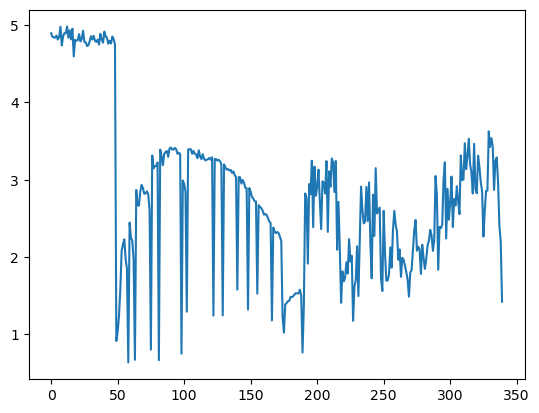

In [1809]:
plt.plot(np.diag(dataANAKL12))

In [1810]:
trace = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_results_anakl/pred_a')

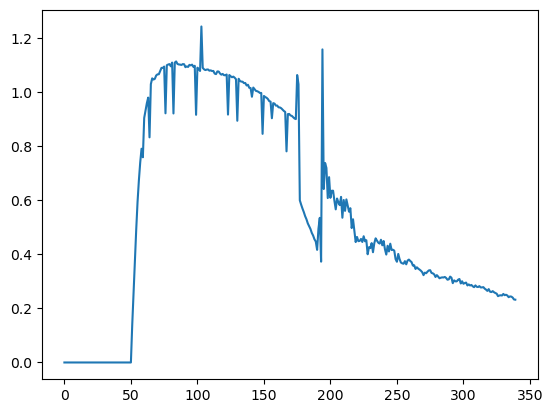

In [1811]:
plt.plot(trace)

In [1812]:
exp_data = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_data/test')
exp_data5 = np.loadtxt('/homes/ar2342/scratch/sasha-model-optimization/_data_er5/test')

In [1813]:
def load_adaptation_trace(file_path): 
        df = pd.read_csv(file_path)
        arr = df.Adaptation.to_numpy()
        arr *= np.sign(np.nansum(arr))
        return arr

In [1854]:
LOSS_IS_PER_SAMPLE = False

# result_dirs = ['_results_mckl2', '_results_temp', '_results_temp5', '_results_hellopy']
# result_dirs = ['realthing4096anaNoBlock', 'realthing4096monteNoBlock','realthing512anaNoBlockN1024sc', 'realthing512anaNoBlockN1024scOptout']
# result_dirs = ['realthing512anaNoBlockScOptoutWOWO_subj1','realthing512anaNoBlockScOptoutWOWO','temp']
result_dirs = [f'realthing401ab/run{i}' for i in range(1,17)]
# result_dirs += [f'temp/']
result_root = '/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results'
coin_bics_path = '/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/coin_bics.txt'
paradigm_ = {k: 'evoked' if k <= 8 else 'spontaneous' for k in range(1,17)}
coin_bics = np.loadtxt(coin_bics_path)
# exp_datasets = [exp_data,exp_data5, exp_data*0]
exp_datasets = [ load_adaptation_trace(f'/homes/ar2342/frogs_project/data/COIN_data/trial_data_{paradigm_[i]}_recovery_participant{(i-1)%8+1}.csv') for i in range(1,17)]
# exp_datasets = [ exp_data5] * 4
# result_dirs = ['_results_anakl', '_results_mckl','_results_anakl_lng','_results_mckl2', '_results_temp']
loss_traces= {}
output_traces= {}
for ii, result_dir in enumerate(result_dirs):
    try: 
        # loss_traces[ii] = np.genfromtxt(f'/homes/ar2342/scratch/sasha-model-optimization/{result_dir}/loss.csv', delimiter=',')
        loss_traces[ii] = np.genfromtxt(f'{result_root}/{result_dir}/loss.csv', delimiter=',')
    except:
        loss_traces[ii] = np.loadtxt(f'{result_root}/{result_dir}/loss')
    output_traces[ii] = np.loadtxt(f'{result_root}/{result_dir}/pred_a.txt')

In [1855]:
!ls /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/

hellopy
hellopy2
hellopy3
realthing2048
realthing401a
realthing401ab
realthing401b
realthing4096anaNoBlock
realthing4096anaNoBlockOptout
realthing4096anaNoBlockWarmup100
realthing4096monteNoBlock
realthing512
realthing512anaNoBlockN1024sc
realthing512anaNoBlockN1024scOptout
realthing512anaNoBlockN1024scOptoutEpsi1em6
realthing512anaNoBlockScOptoutWOWO
realthing512anaNoBlockScOptoutWOWO_subj1
realthing512monteNoBlock
realthing512monteNoBlockN1024
realthing512monteNoBlockN1024sc
recover100ptsAna512attachPro0p05Obs0p1
recover100ptsAna512detachPro0p05Obs0p1
recover100ptsMonte512detachPro0p05Obs0p1
recover10ptsMonte512detachPro0p05Obs0p1
recover300ptsMonte512detach
recover300ptsMonte512detachPro0p05Obs0p1
recover300ptsMonte64detach
recover300ptsMonte64detachPro0p05Obs0p1
recoverTemp
recoverysweep101a
temp
temp101
temp101m160p5s103
temp101m67p8s104
temp2
tempBanana
tempBanana2


<Axes: >

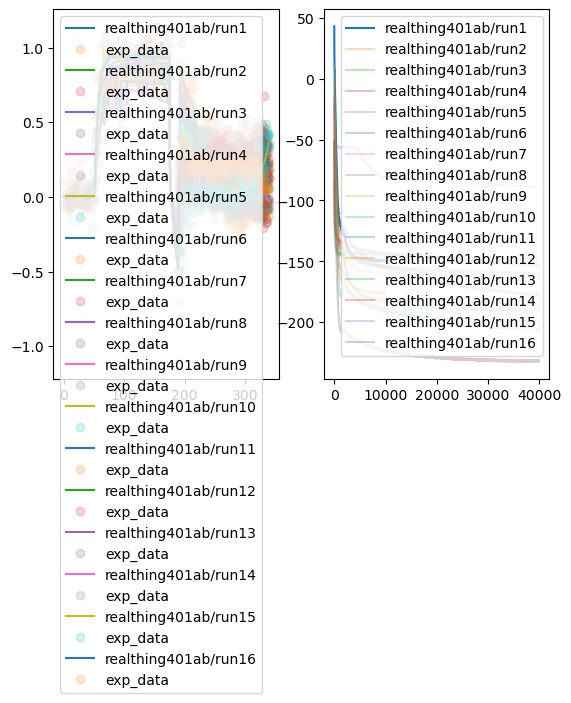

In [1856]:
for ii, result_dir in enumerate(result_dirs):
    plt.subplot(1, 2, 1)
    plt.plot(output_traces[ii], label=result_dir)
    plt.plot(exp_datasets[ii],'o', label='exp_data', linewidth=0.8, alpha=0.2)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(loss_traces[ii][:,0],loss_traces[ii][:,1], label=result_dir, alpha=0.3 if ii>0 else 1.0)
    plt.legend()
plt.subplot(1, 2, 1)


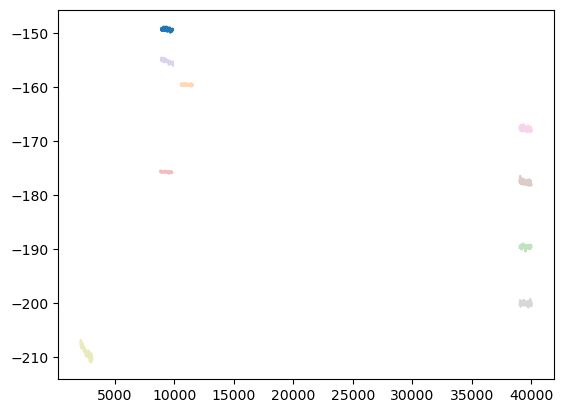

In [1846]:
for ii, result_dir in enumerate(result_dirs):
    plt.plot(loss_traces[ii][-100:,0],loss_traces[ii][-100:,1], label=result_dir, alpha=0.3 if ii>0 else 1.0)



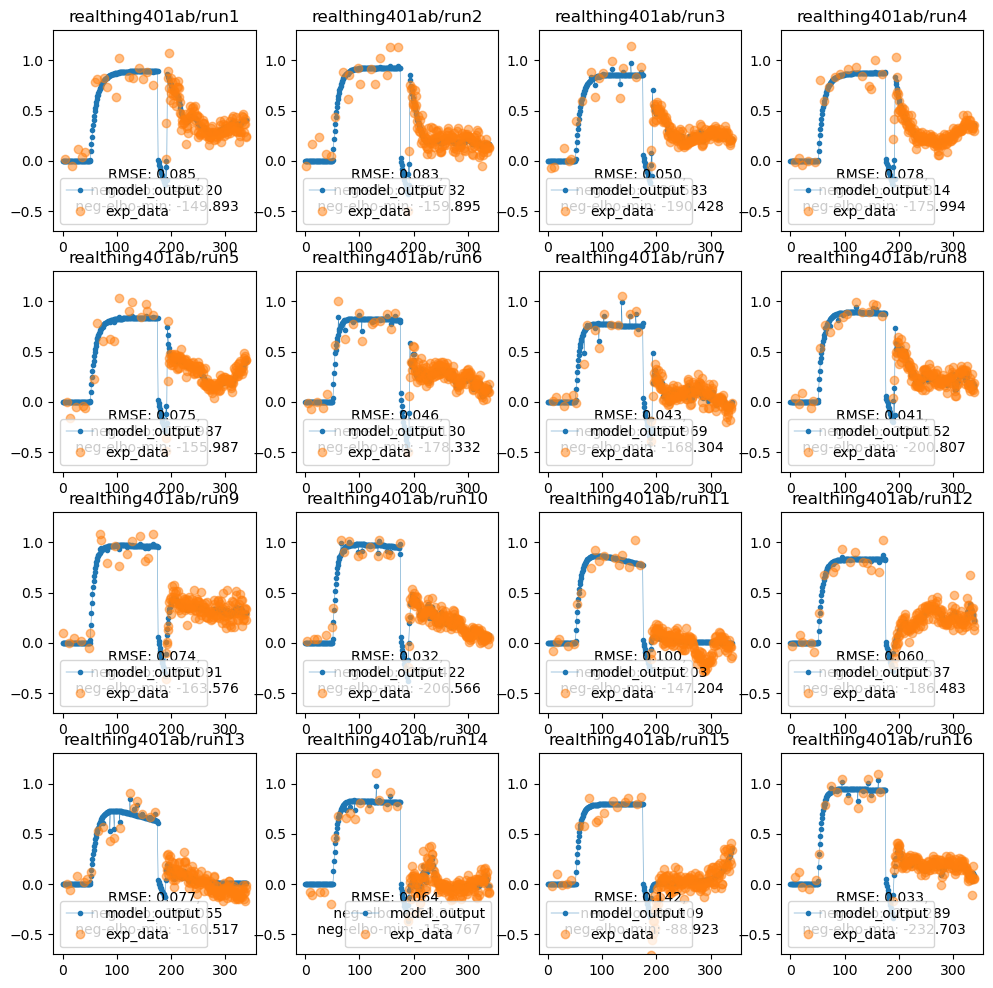

In [1857]:
#plot every result in a separate subplot overlayed with     exp_data
plt.figure(figsize=(12, 12))
for ii, result_dir in enumerate(result_dirs):
    # plt.subplot(2, len(result_dirs)//2, ii+1)
    plt.subplot(4, 4, ii+1)
    plt.plot(output_traces[ii], '.-' , label='model_output', linewidth=0.3)
    plt.plot(exp_datasets[ii],'o', label='exp_data', linewidth=1, alpha=0.5)
    plt.title(result_dir)
    plt.ylim([-0.7,1.3])
    plt.legend()
    rmse = np.sqrt(np.nanmean((output_traces[ii] - exp_datasets[ii])**2))
    plt.text(0.5, 0.1, f'RMSE: {rmse:.3f},\n neg-elbo: {loss_traces[ii][-1,1]:.3f}\n neg-elbo-min: {loss_traces[ii][201:,1].min():.3f}', transform=plt.gca().transAxes, ha='center')
plt.show()

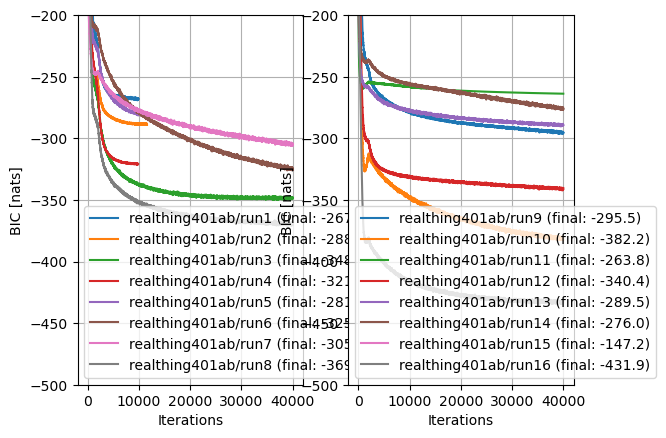

In [1861]:
 #convert loss to bic
#assume k=6 parameters,
# assume that loss is the negative log likelihood,
#  estimate the number of data points as n=length of exp_data
clnn_bics = []
k = 6
n = sum(~np.isnan(exp_data))

for ii in range(len(result_dirs)):
    plt.subplot(1,2,1 if ii<8 else 2)
    nll = loss_traces[ii][:,1] * (n if LOSS_IS_PER_SAMPLE else 1)
    iters = loss_traces[ii][:,0]
    bic = 2*nll + k * np.log(n)
    plt.plot(iters,bic, label=f'{result_dirs[ii]} (final: {bic[-1]:.1f})')
    clnn_bics.append(bic[-1])
    plt.ylim([-500,-200])
for uu in range(1,3):
    plt.subplot(1,2,uu)
    plt.legend()
    plt.grid()
    plt.ylabel('BIC [nats]')
    plt.xlabel('Iterations')

Text(0, 0.5, 'BIC difference (CLNN - COIN) [nats], negative = we are better')

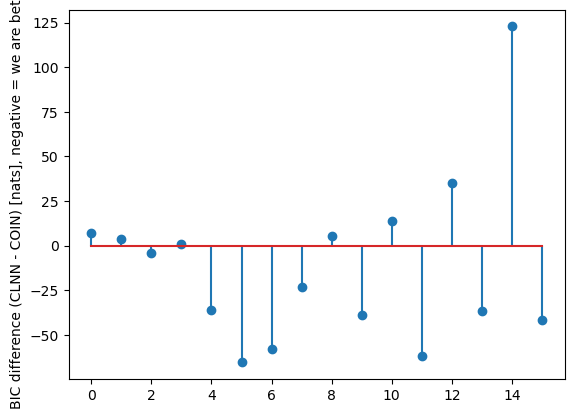

In [1859]:
plt.stem(np.array(np.array(clnn_bics)-coin_bics), 'o')
plt.ylabel('BIC difference (CLNN - COIN) [nats], negative = we are better')

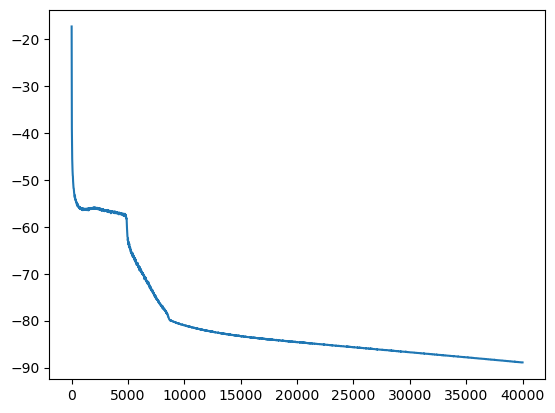

In [1863]:
plt.plot(loss_traces[14][:,0], loss_traces[14][:,1])

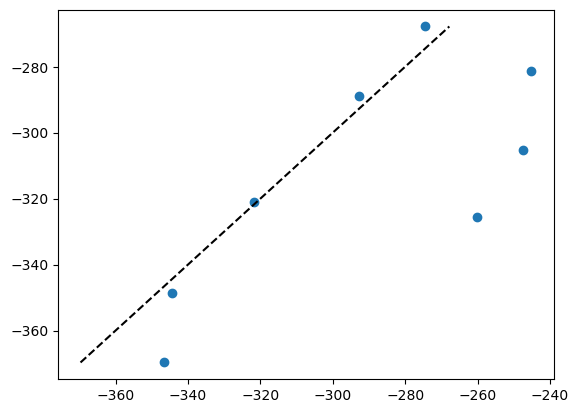

In [1821]:
plt.plot(coin_bics[:8], clnn_bics, 'o')
plt.plot([min(clnn_bics), max(clnn_bics)], [min(clnn_bics), max(clnn_bics)], 'k--')

Text(0.5, 1.0, 'BIC over iterations')

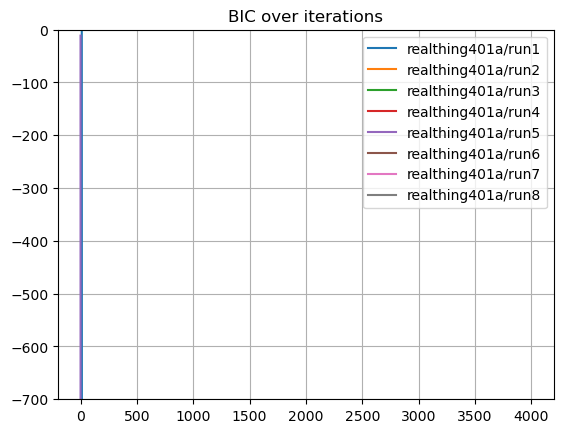

In [1822]:
k = 6
n = sum(~np.isnan(exp_data))
for ii in range(len(result_dirs)):
    nll = loss_traces[ii][:,1] * n
    bic = 2*nll + k * np.log(n)
    plt.plot(bic, label=result_dirs[ii])
plt.legend()
plt.grid()
plt.ylim([-700,0])
plt.title('BIC over iterations')

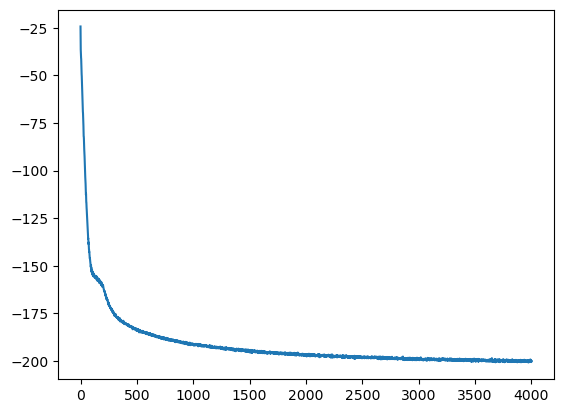

In [1823]:
plt.plot(loss_traces[ii][:,1])

In [1824]:
pwd

'/homes/ar2342'

In [1825]:
# toydir = 'recover100ptsMonte512detachPro0p05Obs0p1'
# toydir = 'recover100ptsMonte512detachPro0p05Obs0p1'
toydir = 'recoverTemp'
toypost = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/{toydir}/post_sigma.txt')
toypost12 = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/{toydir}/post_sigma12.txt')
toypost_mu = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/{toydir}/post_mu.txt')
toy_preda = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/{toydir}/pred_a.txt')
toy_synth_a = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/{toydir}/toysynth_a.txt')

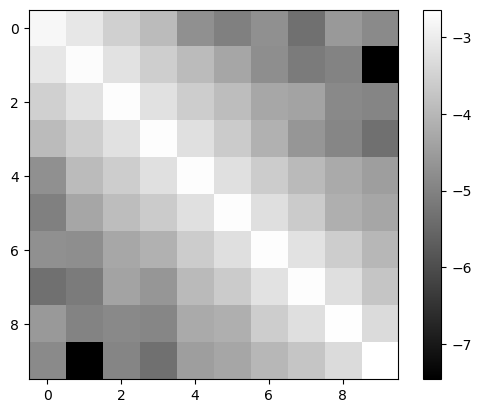

In [1826]:
plt.imshow(np.log10(np.abs(toypost)), cmap='gray')
plt.colorbar()

/tmp/ipykernel_826573/3482281984.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(toypost12)), cmap='gray')


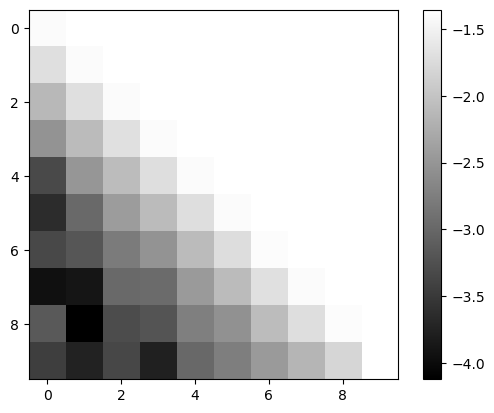

In [1827]:
plt.imshow(np.log10(np.abs(toypost12)), cmap='gray')
plt.colorbar()

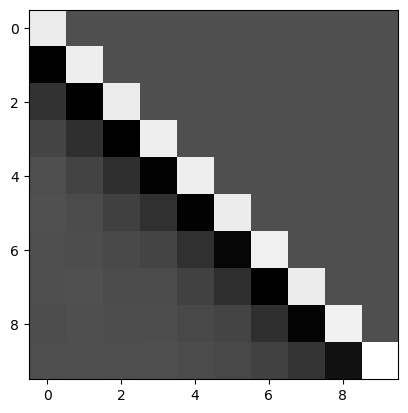

In [1828]:
plt.imshow(toypost12, cmap='gray')

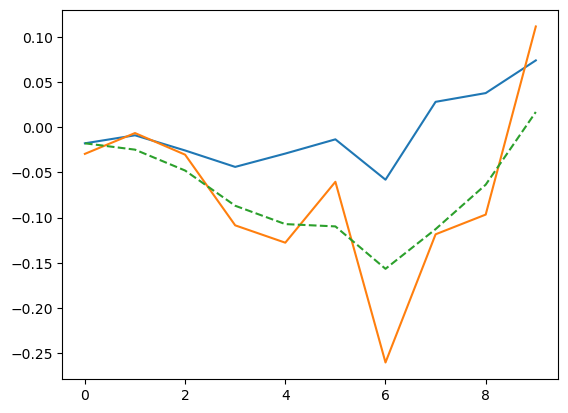

In [1829]:
plt.plot(toypost_mu)
plt.plot(toy_synth_a)
plt.plot(toy_preda,'--')

In [1830]:
np.mean(toy_synth_a)

-0.0726656075567007

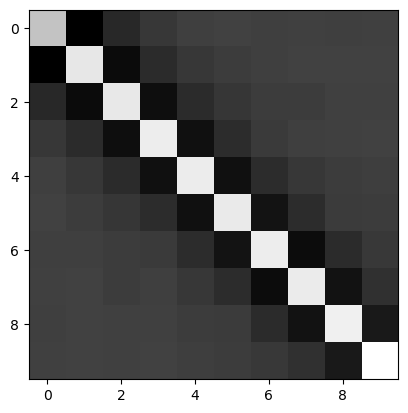

In [1831]:
plt.imshow(toypost12 @ toypost12.T, cmap='gray')

In [1832]:
trajs1 = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp101m67p8s104/pred_a_batch.npz')
trajs2 = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp101m160p5s103/pred_a_batch.npz')

In [1833]:
trajs.files[0]

'as'

In [1834]:
trajs

In [1835]:
trajs.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x70f774167ac0>)

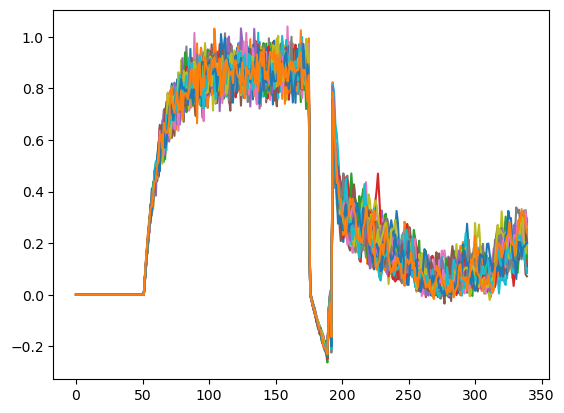

In [1836]:
plt.plot(trajs['as'])

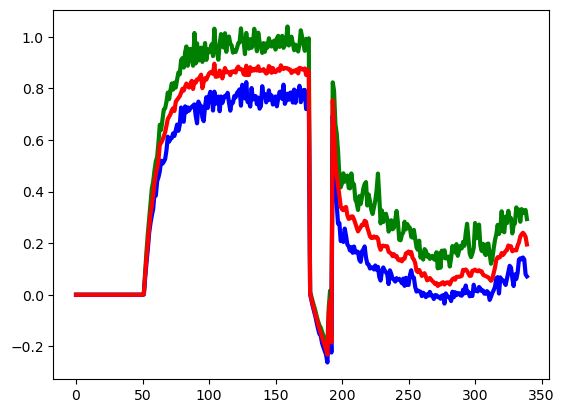

In [1837]:
plt.plot(trajs['as'].max(axis=1), 'g', linewidth=3)
plt.plot(trajs['as'].min(axis=1), 'b', linewidth=3)
plt.plot(trajs['as'].mean(axis=1), 'r', linewidth=3)

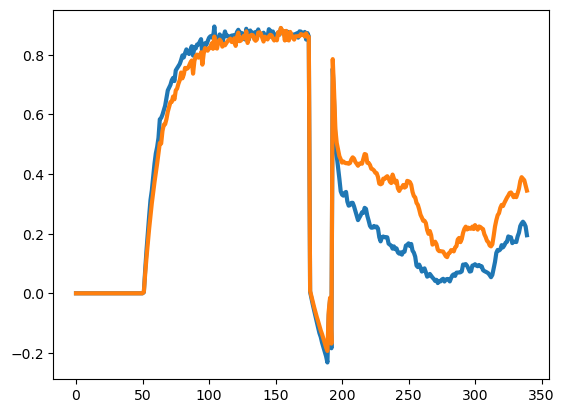

In [1838]:
for these_trajs in [trajs1, trajs2]:
    # plt.plot(these_trajs['as'].max(axis=1), 'g', linewidth=3)
    # plt.plot(these_trajs['as'].min(axis=1), 'b', linewidth=3)
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)

/tmp/ipykernel_826573/3345047556.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


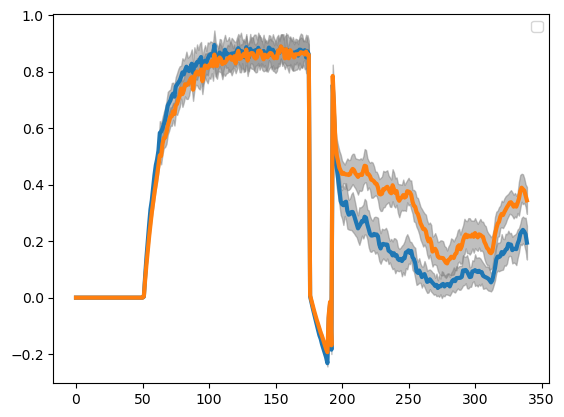

In [1839]:
for these_trajs in [trajs1, trajs2]:
#now plot as mean and shaded region between +/- stddev
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)
    stdtraj = these_trajs['as'].std(axis=1)
    plt.fill_between(np.arange(len(stdtraj)), these_trajs['as'].mean(axis=1)-stdtraj, these_trajs['as'].mean(axis=1)+stdtraj, color='gray', alpha=0.5)
    plt.legend()


In [1840]:
#ranksum of timepoint 225 on the two trajs
import scipy.stats as stats
o = stats.ranksums(trajs1['as'][225, :], trajs2['as'][225, :])
print(o)

RanksumsResult(statistic=-6.7001497902314435, pvalue=2.082060062705088e-11)


/tmp/ipykernel_826573/3789321778.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(180.0, 200.0)

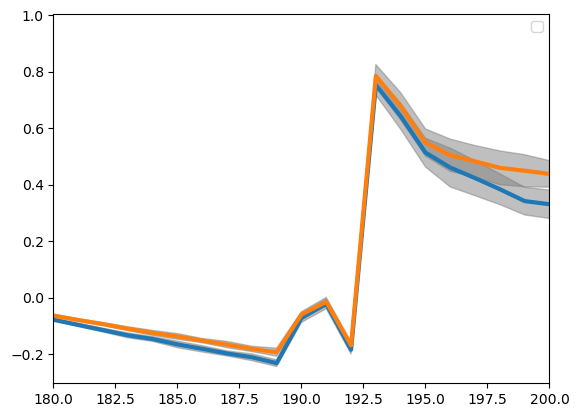

In [1841]:
for these_trajs in [trajs1, trajs2]:
#now plot as mean and shaded region between +/- stddev
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)
    stdtraj = these_trajs['as'].std(axis=1)
    plt.fill_between(np.arange(len(stdtraj)), these_trajs['as'].mean(axis=1)-stdtraj, these_trajs['as'].mean(axis=1)+stdtraj, color='gray', alpha=0.5)
    plt.legend()
plt.xlim([180,200])
